# Pynamical: cobweb plots of the logistic map

Author: Geoff Boeing

http://geoffboeing.com/2015/03/chaos-theory-logistic-map/ 

### To draw these cobweb plots

1. Let x = 0.5
1. Start on the x-axis at the point (x, 0)
1. Draw a vertical line to the red function curve: this point has the coordinates (x, f(x))
1. Draw a horizontal line from this point to the gray diagonal line: this point has the coordinates (f(x), f(x))
1. Draw a vertical line from this point to the red function curve: this point has the coordinates (f(x), f(f(x)))
1. Repeat steps 4 and 5 recursively one hundred times

### To draw the red function curve and gray diagonal line

Run the logistic map once each for 1000 population values evenly spaced between 0 and 1. This gives us the results of the logistic equation (y values) across the entire range of possible population values (x values). The gray diagonal line is just a plot of y=x.

In [1]:
from pynamical import cobweb_plot
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image as PIL_Image
from images2gif import writeGif
%matplotlib inline

## Draw cobweb plots for several values of r

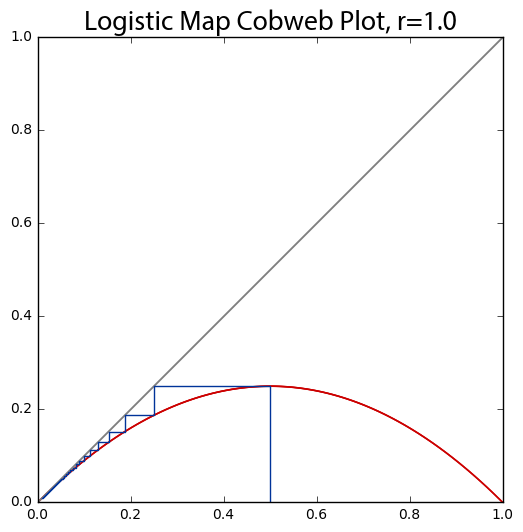

In [2]:
cobweb_plot(r=1.0)

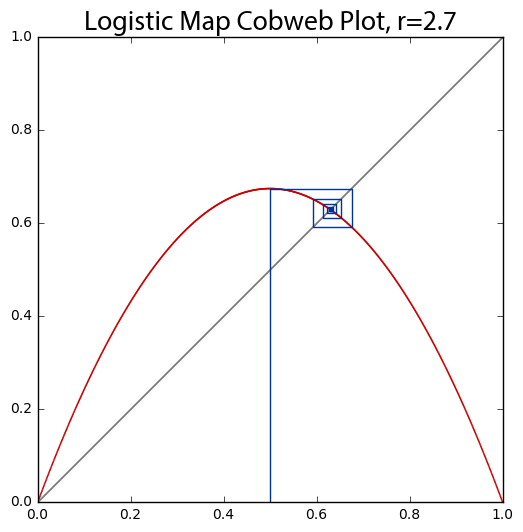

In [3]:
cobweb_plot(r=2.7)

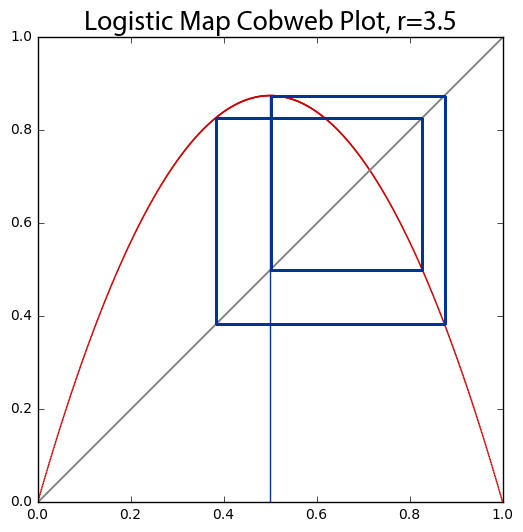

In [4]:
cobweb_plot(r=3.5)

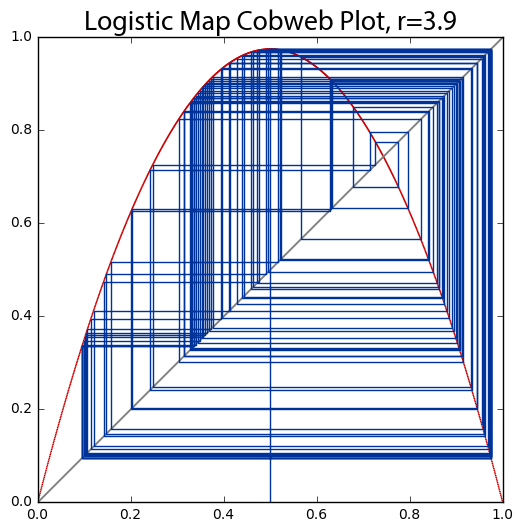

In [5]:
cobweb_plot(r=3.9)

## Demonstrate a basin of attraction with three different initial values and same r

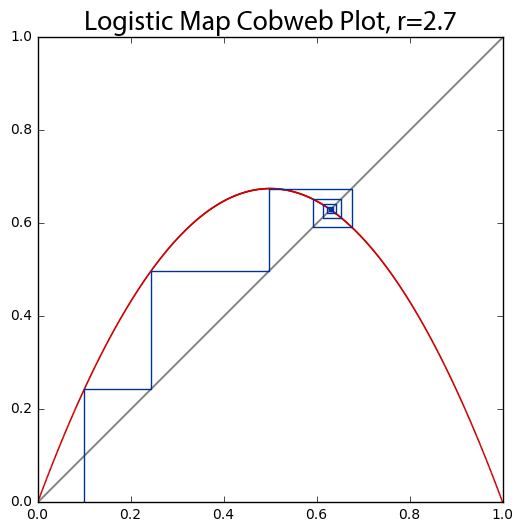

In [6]:
cobweb_plot(r=2.7, cobweb_x=0.1)

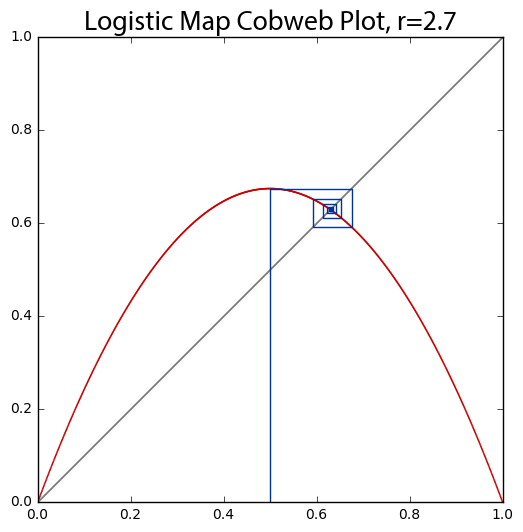

In [7]:
cobweb_plot(r=2.7, cobweb_x=0.5)

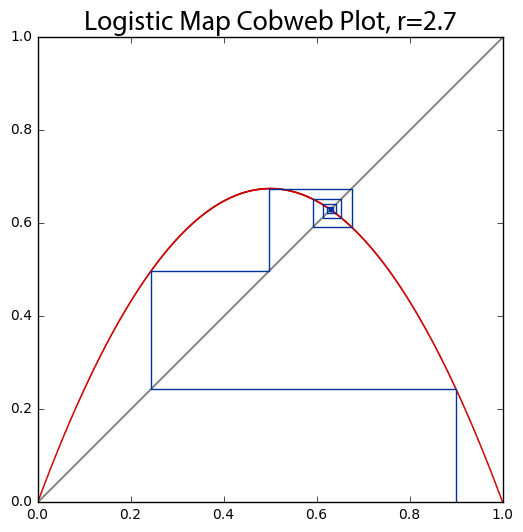

In [8]:
cobweb_plot(r=2.7, cobweb_x=0.9)

## Now animate it

In [9]:
# configure the animation: 70 rates between 0 and 3.999 plus 15 paused frames each at start and end
save_folder = 'cobweb-animate'
start_r = 0
end_r = 3.999
steps = 70
start_end_pause = 15
rates = np.linspace(start_r, end_r, steps)
rates = np.append([start_r] * start_end_pause, rates)
rates = np.append(rates, [end_r] * start_end_pause)

In [10]:
# create a plot for each growth rate
for r, n in zip(rates, range(len(rates))):
    filename = '{}/{:03d}'.format(save_folder, n)
    title = 'Logistic Map Cobweb Plot, r={:.2f}'.format(r)
    cobweb_plot(r=r, filename=filename, title=title, show=False)
    plt.close()

In [11]:
# create an animated gif of all the plots then display it inline
images = [PIL_Image.open(image) for image in glob.glob('images/{}/*.png'.format(save_folder))]
gif_filename = 'images/{}/animated-logistic-cobweb.gif'.format(save_folder)
writeGif(gif_filename, images, duration=0.1)

In [12]:
IPdisplay.Image(url=gif_filename)